##Only run this once

get libraries, install mido, mount drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install mido

     |████████████████████████████████| 51 kB 1.4 MB/s 


In [3]:
import mido
from mido import MidiFile
import os
import glob

import numpy as np
import pandas as pd

#Load extracted features

In [4]:
path = r'PATH TO "better_data.csv"'

data = pd.read_csv(path)
data.drop(columns = ['Unnamed: 0'], inplace = True)

data.head()

,composer,file_path,maxNotes,avgDist,avgTime,maxVel,avgVel
0,Alexander Scriabin,/content/drive/MyDrive/Colab Notebooks/Machine...,6,12.355605,0.083160,108,62.954085
1,Alexander Scriabin,/content/drive/MyDrive/Colab Notebooks/Machine...,6,13.592685,0.061817,121,65.008211
2,Alexander Scriabin,/content/drive/MyDrive/Colab Notebooks/Machine...,6,11.839422,0.131707,111,60.342821
3,Alexander Scriabin,/content/drive/MyDrive/Colab Notebooks/Machine...,10,6.452150,0.117520,110,58.776699
4,Alexander Scriabin,/content/drive/MyDrive/Colab Notebooks/Machine...,8,12.300821,0.088088,112,70.214286


#Classifier setup

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn.datasets import load_digits 
from sklearn import model_selection 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [6]:
df = data

df.head()

,composer,file_path,maxNotes,avgDist,avgTime,maxVel,avgVel
0,Alexander Scriabin,/content/drive/MyDrive/Colab Notebooks/Machine...,6,12.355605,0.083160,108,62.954085
1,Alexander Scriabin,/content/drive/MyDrive/Colab Notebooks/Machine...,6,13.592685,0.061817,121,65.008211
2,Alexander Scriabin,/content/drive/MyDrive/Colab Notebooks/Machine...,6,11.839422,0.131707,111,60.342821
3,Alexander Scriabin,/content/drive/MyDrive/Colab Notebooks/Machine...,10,6.452150,0.117520,110,58.776699
4,Alexander Scriabin,/content/drive/MyDrive/Colab Notebooks/Machine...,8,12.300821,0.088088,112,70.214286


In [7]:
features = ['maxNotes', 'avgDist', 'avgTime', 'maxVel', 'avgVel'] # choose columns for features
target = ['composer']

In [8]:
# Save variables
X = df[features].values
y = df[target].values.ravel()

In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=137)

#KNN

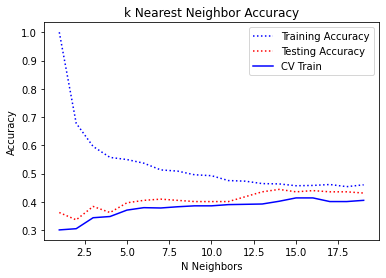

Best k: 15


In [10]:
# Run this with and without random_state

kLIST = np.arange(1, 20)
best_depths = []


train_scores = []
test_scores = []
cv_scores = []

for k in kLIST:
  clf = neighbors.KNeighborsClassifier(n_neighbors=k)
  clf.fit(X_train,y_train)
  
  test_score = clf.score(X_test,y_test)
  train_score = clf.score(X_train,y_train)
  cv_score = model_selection.cross_val_score(clf,X_train,y_train).mean() #get the average score for each fold
  
  train_scores.append(train_score)
  test_scores.append(test_score)
  cv_scores.append(cv_score)  #store the 'score' for the tree with depth d

kBEST = kLIST[np.argmax(cv_scores)]


#plot our results
plt.plot(kLIST, train_scores, 'b:',label='Training Accuracy')
plt.plot(kLIST, test_scores, 'r:',label='Testing Accuracy')
plt.plot(kLIST, cv_scores,'b-', label='CV Train')
plt.legend()
plt.xlabel('N Neighbors')
plt.ylabel('Accuracy')
plt.title('k Nearest Neighbor Accuracy')
    

plt.show()

kBEST = kLIST[np.argmax(cv_scores)]
print(f'Best k: {kBEST}')

#Linear regressor

In [11]:
# Save variables
X = df[features].values
y = df[target].values.ravel()

In [12]:
y_nums = pd.factorize(y)[0]

In [13]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y_nums, test_size=0.2, random_state=137)

In [14]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

clfLIN = linear_model.LinearRegression()
clfLIN.fit(X_train,y_train)  # only train on the training data!!!!!!!!!!!
clfLIN.score(X_train,y_train)

0.03912024625924504

#Ridge classifier

In [15]:
# Save variables
X = df[features].values
y = df[target].values.ravel()

y_nums = pd.factorize(y)[0]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y_nums, test_size=0.2, random_state=137)

In [16]:
alphas = np.linspace(0,100)
maxScore = 0

for i in alphas:
  clfRIDGE = linear_model.Ridge(alpha=i)
  clfRIDGE.fit(X_train,y_train)  # only train on the training data!!!!!!!!!!!
  score = clfRIDGE.score(X_train,y_train)

  if score > maxScore:
    maxScore = score

In [17]:
maxScore

0.03912024625924526

#Lasso

In [18]:
# Save variables
X = df[features].values
y = df[target].values.ravel()

y_nums = pd.factorize(y)[0]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y_nums, test_size=0.2, random_state=137)

In [19]:
alphas = np.linspace(0,100)
maxScore = 0

for i in alphas:
  clfRIDGE = linear_model.Lasso(alpha=i)
  clfRIDGE.fit(X_train,y_train)  # only train on the training data!!!!!!!!!!!
  score = clfRIDGE.score(X_train,y_train)

  if score > maxScore:
    maxScore = score

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.558e+03, tolerance: 9.488e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, po

In [20]:
maxScore

0.03912024625924504

#Bagging

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [22]:
# Save variables
X = df[features].values
y = df[target].values.ravel()

y_nums = pd.factorize(y)[0]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y_nums, test_size=0.2, random_state=137)

In [23]:
varList = np.linspace(0.1, 1)

train_scores = []
test_scores = []
cv_scores = []

for v in varList:
  clf = BaggingClassifier(KNeighborsClassifier(), max_samples=v, max_features=0.9)
  clf.fit(X_train,y_train)
  
  test_score = clf.score(X_test,y_test)
  train_score = clf.score(X_train,y_train)
  cv_score = model_selection.cross_val_score(clf,X_train,y_train).mean() #get the average score for each fold
  
  train_scores.append(train_score)
  test_scores.append(test_score)
  cv_scores.append(cv_score)  #store the 'score' for the tree with depth d

vBest = varList[np.argmax(cv_scores)]

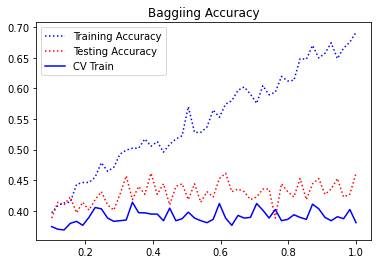

0.41380412670735256
0.3387755102040817


In [24]:
plt.plot(varList, train_scores, 'b:',label='Training Accuracy')
plt.plot(varList, test_scores, 'r:',label='Testing Accuracy')
plt.plot(varList, cv_scores,'b-', label='CV Train')
plt.title('Baggiing Accuracy')
plt.legend()
    

plt.show()
print(max(cv_scores))
print(vBest)

#Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
# Save variables
X = df[features].values
y = df[target].values.ravel()

y_nums = pd.factorize(y)[0]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y_nums, test_size=0.2, random_state=137)

In [27]:
varList = range(1, 20)

train_scores = []
test_scores = []
cv_scores = []

for v in varList:
  clf = RandomForestClassifier(n_estimators=v)
  clf.fit(X_train,y_train)
  
  test_score = clf.score(X_test,y_test)
  train_score = clf.score(X_train,y_train)
  cv_score = model_selection.cross_val_score(clf,X_train,y_train).mean() #get the average score for each fold
  
  train_scores.append(train_score)
  test_scores.append(test_score)
  cv_scores.append(cv_score)  #store the 'score' for the tree with depth d

vBest = varList[np.argmax(cv_scores)]

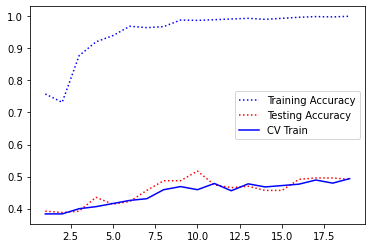

0.49361232199941873
19


In [28]:
plt.plot(varList, train_scores, 'b:',label='Training Accuracy')
plt.plot(varList, test_scores, 'r:',label='Testing Accuracy')
plt.plot(varList, cv_scores,'b-', label='CV Train')
plt.legend()
    

plt.show()
print(max(cv_scores))
print(vBest)

#Trying with just 2 composers

In [29]:
print(np.unique(y))

['Alexander Scriabin' 'Claude Debussy' 'Domenico Scarlatti'
 'Felix Mendelssohn' 'Franz Liszt' 'Franz Schubert' 'Frédéric Chopin'
 'Johann Sebastian Bach' 'Johannes Brahms' 'Joseph Haydn'
 'Ludwig van Beethoven' 'Robert Schumann' 'Sergei Rachmaninoff'
 'Wolfgang Amadeus Mozart']


In [30]:
def getIndices(composerName, composerArr):
  for i in range(len(y)):
    if y[i] == composerName:
      composerArr.append(i)
  return composerArr

bach_indices = []
chopin_indices = []

bach_indices = getIndices('Johann Sebastian Bach', bach_indices)
chopin_indices = getIndices('Frédéric Chopin', chopin_indices)

In [31]:
X_Bach = X[bach_indices[0]:bach_indices[-1]]
X_Chopin = X[chopin_indices[0]:chopin_indices[-1]]

X_twoComps = np.concatenate((X_Bach, X_Chopin), axis = 0)

In [32]:
y_Bach = y[bach_indices[0]:bach_indices[-1]]
y_Chopin = y[chopin_indices[0]:chopin_indices[-1]]

y_twoComps = np.concatenate((y_Bach, y_Chopin), axis = 0)

In [33]:
y_twoComps_nums = pd.factorize(y_twoComps)[0]

#KNN

In [34]:
# Save variables
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_twoComps, y_twoComps, test_size=0.2, random_state=137)

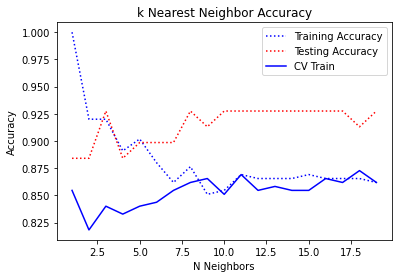

Max score: 0.8727272727272728
Best k: 18


In [35]:
# Run this with and without random_state

kLIST = np.arange(1, 20)
best_depths = []


train_scores = []
test_scores = []
cv_scores = []

for k in kLIST:
  clf = neighbors.KNeighborsClassifier(n_neighbors=k)
  clf.fit(X_train,y_train)
  
  test_score = clf.score(X_test,y_test)
  train_score = clf.score(X_train,y_train)
  cv_score = model_selection.cross_val_score(clf,X_train,y_train).mean() #get the average score for each fold
  
  train_scores.append(train_score)
  test_scores.append(test_score)
  cv_scores.append(cv_score)  #store the 'score' for the tree with depth d

kBEST = kLIST[np.argmax(cv_scores)]


#plot our results
plt.plot(kLIST, train_scores, 'b:',label='Training Accuracy')
plt.plot(kLIST, test_scores, 'r:',label='Testing Accuracy')
plt.plot(kLIST, cv_scores,'b-', label='CV Train')
plt.legend()
plt.xlabel('N Neighbors')
plt.ylabel('Accuracy')
plt.title('k Nearest Neighbor Accuracy')
    

plt.show()

kBEST = kLIST[np.argmax(cv_scores)]
print(f'Max score: {max(cv_scores)}')
print(f'Best k: {kBEST}')

#GNB

In [36]:
clfGNB = naive_bayes.GaussianNB()
clfGNB.fit(X_train,y_train)  # only train on the training data!!!!!!!!!!!
clfGNB.score(X_train,y_train)

0.8763636363636363

#Decision Tree

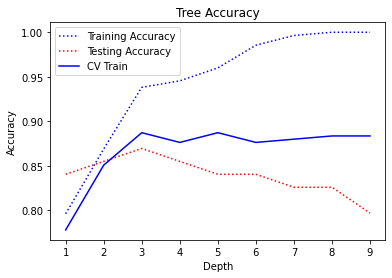

0.8872727272727273


In [37]:
# Run this with and without random_state

# plt.figure(figsize=(10,10))


dLIST = np.arange(1, 10)
best_depths = []


train_scores = []
test_scores = []
cv_scores = []

for d in dLIST:
  clf = DecisionTreeClassifier(max_depth=d)
  clf.fit(X_train,y_train)
  
  test_score = clf.score(X_test,y_test)
  train_score = clf.score(X_train,y_train)
  cv_score = model_selection.cross_val_score(clf,X_train,y_train).mean() #get the average score for each fold
  
  train_scores.append(train_score)
  test_scores.append(test_score)
  cv_scores.append(cv_score)  #store the 'score' for the tree with depth d

dBEST = dLIST[np.argmax(cv_scores)]
best_depths.append(dBEST) #store the best depth for each iteration

#plot our results
plt.plot(dLIST, train_scores, 'b:',label='Training Accuracy')
plt.plot(dLIST, test_scores, 'r:',label='Testing Accuracy')
plt.plot(dLIST, cv_scores,'b-', label='CV Train')
plt.legend()
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Tree Accuracy')
    

plt.show()
print(max(cv_scores))

#Random Forest

In [38]:
varList = range(1, 20)

train_scores = []
test_scores = []
cv_scores = []

for v in varList:
  clf = RandomForestClassifier(n_estimators=v)
  clf.fit(X_train,y_train)
  
  test_score = clf.score(X_test,y_test)
  train_score = clf.score(X_train,y_train)
  cv_score = model_selection.cross_val_score(clf,X_train,y_train).mean() #get the average score for each fold
  
  train_scores.append(train_score)
  test_scores.append(test_score)
  cv_scores.append(cv_score)  #store the 'score' for the tree with depth d

vBest = varList[np.argmax(cv_scores)]

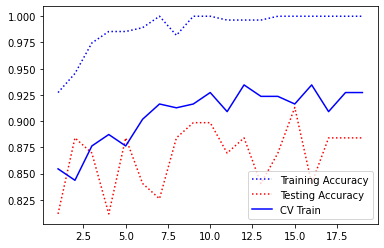

0.9345454545454546


In [39]:
plt.plot(varList, train_scores, 'b:',label='Training Accuracy')
plt.plot(varList, test_scores, 'r:',label='Testing Accuracy')
plt.plot(varList, cv_scores,'b-', label='CV Train')
plt.legend()
    

plt.show()
print(max(cv_scores))